# Phase 3 Code Challenge Review

Made using resources from the Seattle team - thanks y'all.

## Overview

* Gradient Descent
* Logistic Regression
* Classification Metrics
* Decision Trees

In [99]:
# Imports
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import ConfusionMatrixDisplay, RocCurveDisplay

In [98]:
#from src.call import call_on_students

## Part 1: Gradient Descent

### Set Up

In [49]:
# Grab the data from 'auto-mpg.csv'
mpg_df = pd.read_csv("data/auto-mpg.csv")

In [50]:
# Explore the data
mpg_df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


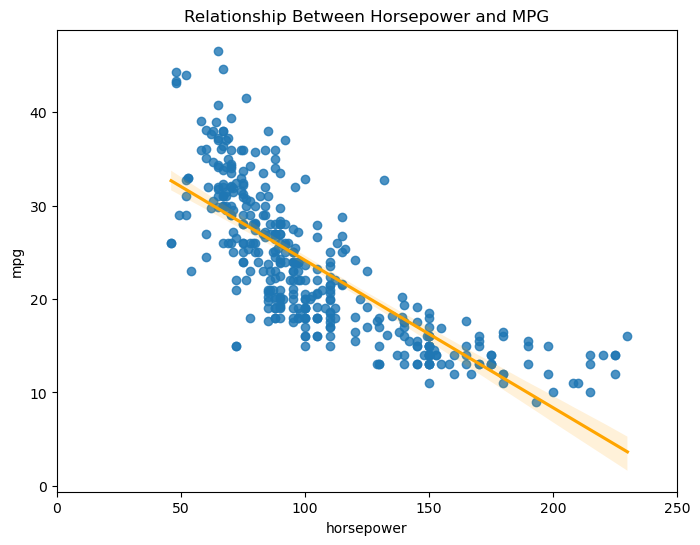

In [51]:
# Let's plot a simple linear regression line using just the horsepower column
plt.figure(figsize=(8, 6))
sns.regplot(x='horsepower', y='mpg', data=mpg_df, line_kws={"color":"orange"})
plt.title('Relationship Between Horsepower and MPG')
plt.xlim(0, 250)
plt.show()

The above graph shows an approximate best fit line for the relationship between `horsepower` and `mpg` in our data.


### 1) Describe the below chart: What is it showing? What does it tell us?

![Slope-RSS relationship image](images/slope-rss-relationship.png)

In [52]:
# call_on_students(1)

#### Answer: 

- rss represents loss function. ribbed of curve gives slope. we are minimizing the slope . we want to decrease our error.
- 0.155 slope equal to 0. the optimal slope is -0.158 the optimal coef level, where RSS is the smallest


### 2) Imagine that you're starting at a slope towards the top upper left corner. Using Zoom's annotate feature, demonstrate how gradient descent would work 

In [53]:
# call_on_students(1)

### 3) What is a step size when talking about gradient descent? How does learning rate regulate step size?

In [54]:
# call_on_students(1)

#### Answer: 

- a "step size" refers to the size of the steps taken to update the model's parameters during the optimization process
- you can start with bigger steps and finish with smaller onces
- If the learning rate is too small, the algorithm may converge very slowly, and if it's too large, it may fail to converge or overshoot the minimum.

## Part 2: Logistic Regression

### 4) Describe a logistic regression model:

- What kind of target is a logistic regression model used for?
- What are the predictions that a logistic regression model outputs?
- How is it different from linear regression?
- Is it a parametric or non-parametric model?

In [55]:
# call_on_students(1)

#### Answer: 

- It is a classification technique and is best suited for predicting the categorical response variable.
- the probability of our input belonging to the class labeled with 1.log -odds which translated into probabilities
- In the case of linear regression, we can easily anticipate the value of continuous variables. In the case of logistic regression, we can easily anticipate the values of categorical variables.
- parametric. it has coef 


### 5) Compare a logistic regression model to any of the other model types we've learned:

- List one benefit of logistic regression when compared to the other model type
- List one reason the other model type might be more useful
- fot log regression we need to standarilized, regulirizations goes to the model

In [56]:
# call_on_students(1)

#### Answer: 

- easier to implement, interpret, and train
- Decision trees excel as an alternative to logistic regression due to their ability to model complex, non-linear relationships and provide intuitive visualizations. They adapt to data structure, enhancing flexibility and accuracy for binary outcomes.


## Part 3: Logistic Regression and Classification Metrics with Code

### Set Up

In [57]:
# Let's use the same data, but now with a classification target
mpg_class = pd.read_csv('data/auto-mpg-classification.csv')

In [58]:
# Check this new dataframe out
mpg_class.head()

,cylinders,displacement,horsepower,weight,acceleration,model year,origin,target
0,8,307.0,130,3504,12.0,70,1,0
1,8,350.0,165,3693,11.5,70,1,1
2,8,318.0,150,3436,11.0,70,1,0
3,8,304.0,150,3433,12.0,70,1,1
4,8,302.0,140,3449,10.5,70,1,1


### 6) Prepare our data for modeling:

1. Perform a train/test split
2. Scale the inputs


In [59]:
# call_on_students(1)

In [60]:
# Train-test split
from sklearn.model_selection import train_test_split

X = mpg_class.drop(columns=['target'])
y = mpg_class['target']

# Set test_size=0.33 and random_state=42
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [61]:
# Scale the data
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X_train)

X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

### 7) Explore the `target` column and our model-less baseline

1. What is the breakdown of the `target` column in our training data?
2. What would a model-less baseline look like in this context?
3. How accurate would that model-less understanding be on our test data?

In [62]:
# call_on_students(1)

#### Part 1: explore the target column breakdown in train data

In [105]:
# Code to explore
class_counts = y_train.value_counts()
print(class_counts)
y_test.value_counts(normalize=True)

target
0    195
1     67
Name: count, dtype: int64


target
0    0.753846
1    0.246154
Name: proportion, dtype: float64

#### Answer:

- imbalanced , 74% in class 0


#### Part 2: What would a model-less baseline look like in this context?

#### Answer:

- The model-less baseline prediction for all data points in  test set would be Class 0 because it is the majority class.
- SMOTE


#### Part 3: How accurate would that baseline be on test data?


In [64]:
# Code to find the answer
from sklearn.metrics import accuracy_score
from sklearn.dummy import DummyClassifier

# Create a dummy classifier that predicts the majority class
dummy_classifier = DummyClassifier(strategy="most_frequent")

# Fit the dummy classifier on the training data
dummy_classifier.fit(X_train, y_train)

# Predict using the dummy classifier
y_pred_baseline = dummy_classifier.predict(X_test)

# Assuming y_test contains the true labels and y_pred_baseline is the model-less baseline predictions
accuracy_baseline = accuracy_score(y_test, y_pred_baseline)

print(f"Accuracy of the baseline model: {accuracy_baseline:.2f}")


Accuracy of the baseline model: 0.75


#### Answer:

-  0.75


### 8) What is one problem you could foresee based on this breakdown, and what is one strategy you could employ to address that problem?

In [65]:
# call_on_students(1)

#### Answer:

- class imbalance


### 9) Fit a logistic regression model, and plot a confusion matrix of the results on our test set

In [66]:
# call_on_students(1)

In [67]:
# Fit a logistic regression model
# Name the model `logreg` and set random_state = 42
# Import necessary libraries
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

logreg = LogisticRegression(random_state=42)

# Fit the model to the training data
logreg.fit(X_train, y_train)

# Make predictions on the test data
y_pred = logreg.predict(X_test)

# Calculate the confusion matrix
cm = confusion_matrix(y_test, y_pred)


/opt/homebrew/Caskroom/miniforge/base/envs/learn-env/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


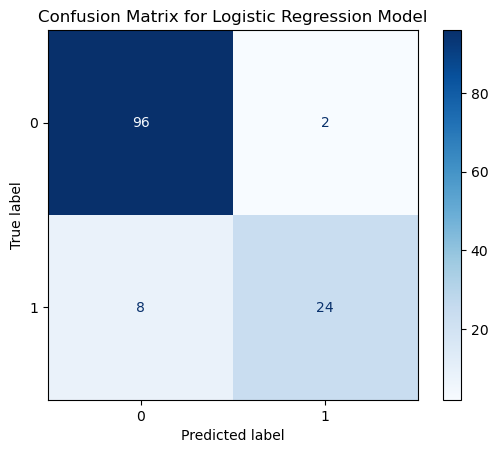

In [68]:
# Plot a confusion matrix on the test data
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=logreg.classes_)
disp.plot(cmap='Blues', values_format='d')
plt.title('Confusion Matrix for Logistic Regression Model')
plt.show()


### 10) Calculate the accuracy, precision, recall and f1-score for the test set

You can use the confusion matrix above, or sklearn functions

In [69]:
# call_on_students(1)

In [70]:
# Accuracy
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

accuracy = accuracy_score(y_test, y_pred)
accuracy


0.9230769230769231

In [71]:
# Precision
precision = precision_score(y_test, y_pred)
precision

0.9230769230769231

In [72]:
# Recall
recall = recall_score(y_test, y_pred)
recall

0.75

In [73]:
# F1-Score
f1 = f1_score(y_test, y_pred)
f1

0.8275862068965517

### 11) Calculate the ROC-AUC on the test set, and plot the ROC curve

For this you'll definitely want to use the sklearn functions!

In [74]:
# call_on_students(1)

In [106]:
# Calculate roc-auc
from sklearn.metrics import roc_auc_score, roc_curve, auc
import matplotlib.pyplot as plt

# Calculate ROC-AUC score
roc_auc = roc_auc_score(y_test, logreg.predict_proba(X_test)[:, 1])

# Calculate ROC curve
fpr, tpr, _ = roc_curve(y_test, logreg.predict_proba(X_test)[:, 1])
roc_auc = auc(fpr, tpr)
roc_auc

0.9837372448979592

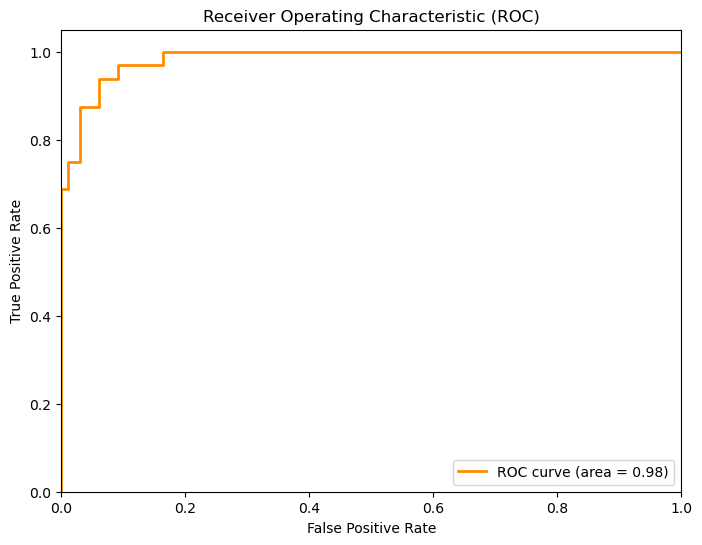

In [107]:
# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc='lower right')
plt.show()


### 12) Evaluate! Based on the metrics of our test data, how is our model doing?

In [77]:
# call_on_students(1)

#### Answer:

- A perfect result would be the point (0, 1) indicating 0% false positives and 100% true positives.
- very high metrics all around - more Fn then Fp(better precision then recall)


## Part 4: Decision Trees

### Set Up - Generating 1-split trees to compare

In [78]:
# Creating two different decision trees with a single split
dt_maxdepth1_v1 = DecisionTreeClassifier(max_depth=1, random_state = 42)
dt_maxdepth1_v2 = DecisionTreeClassifier(max_depth=1, random_state = 42)

# Training the two trees on different columns
dt_maxdepth1_v1.fit(X_train[['weight']], y_train)
dt_maxdepth1_v2.fit(X_train[['origin']], y_train)

DecisionTreeClassifier(max_depth=1, random_state=42)

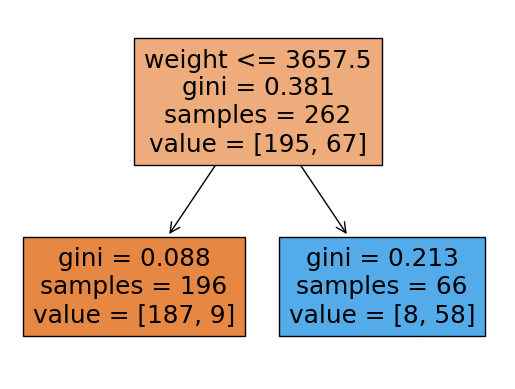

In [79]:
# Tree based on 1st column
plot_tree(dt_maxdepth1_v1, feature_names=['weight'], filled=True);

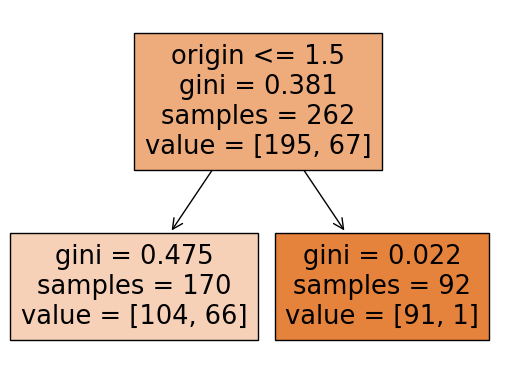

In [80]:
# Tree based on 2nd column
plot_tree(dt_maxdepth1_v2, feature_names=['origin'], filled=True);

#### Result: 

(showing the image output incase there is a problem with the above code to generate and visualize these trees)

| Version 1: Weight | Version 2: Origin |
| ----------------- | ----------------- |  
| ![max depth 1 - version 1](images/dt-maxdepth1-v1.png) | ![max depth 1 - version 2](images/dt-maxdepth1-v2.png) |

### 13) Which of these trees does a better job splitting the data? How can you tell?

In [81]:
# call_on_students(1)

#### Answer:

- Version 1, cause gini is smaller


### 14) Fit a decision tree model, and plot a confusion matrix of the results on our test set

In [82]:
# call_on_students(1)

In [101]:
# Fit a decision tree model
# Name the model `dt` and set random_state = 42

from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier(random_state=42)
tree_clf = dt.fit(X_train_scaled, y_train)

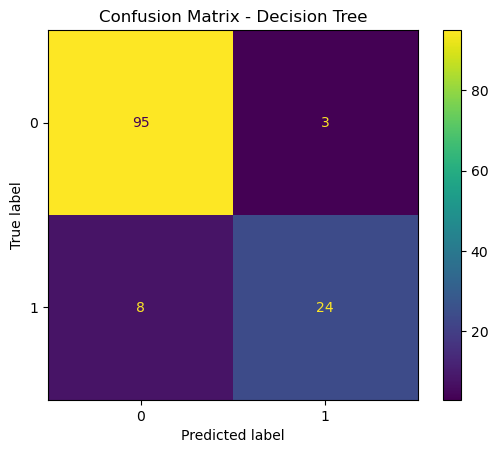

In [108]:
# Plot a confusion matrix on the test data
ConfusionMatrixDisplay.from_estimator(dt,X_test_scaled, y_test)
plt.title('Confusion Matrix - Decision Tree')
plt.show()

/opt/homebrew/Caskroom/miniforge/base/envs/learn-env/lib/python3.9/site-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


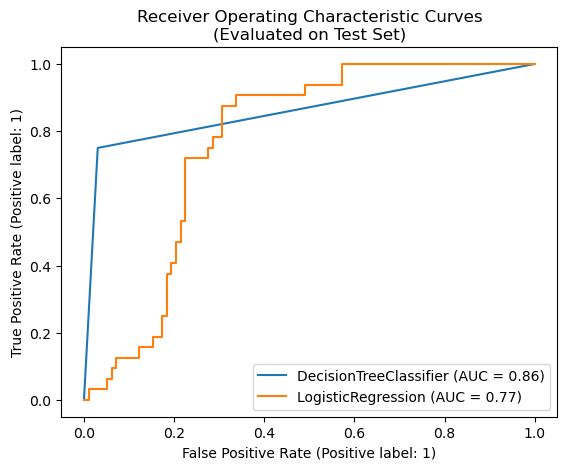

In [109]:
# Code to visualize the ROC curves for the models we've done
fig, ax = plt.subplots()
RocCurveDisplay.from_estimator(dt, X_test_scaled, y_test, ax=ax)
RocCurveDisplay.from_estimator(logreg, X_test_scaled, y_test, ax=ax)

plt.title("Receiver Operating Characteristic Curves\n(Evaluated on Test Set)")
plt.show()

### 15) Which is the better model according to ROC-AUC score? How can you tell?

In [ ]:
# call_on_students(1)

#### Answer:

- the more the better. Logistic Regression has a bigger number. has more and under the curve
